# Module 5, Activity 1: Visualising networks

In this activity, we're going to create and explore a random network. We'll do this with **networkx** and **matplotlib**. There are several other libraries that can be used to make network figures including Plotly, but **networkx** is one of the most popular libraries. It's also very modular like Matplotlib, so it's easier for us to get a handle on quickly. Let's start by loading our libraries. Remember to install any you don't have first.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx # for dealing with network data
from networkx.algorithms import bipartite
import random

Here, we're going to work on a randomly generated network to get familiar with the syntax and capabilities of networkx. First, we need to generate a graph object. Networkx has dozens of random graph generator functions (see section 5.6 of the [reference material](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf)). We'll use **gnp_random_graph**, which requires three arguments: n - the number of vertices (nodes), p - the probability of an edge between any two nodes and a seed value, which allows us to reproduce a random graph by generating the same edge and node list each time.

In [5]:
G = nx.gnp_random_graph(n = 20, p = 0.2, seed = 1)
G

So far no network diagram - G is just a graph object that stores all the network's objects. For example, we can call the nodes and edge lists easily:

In [6]:
G.nodes() # Call nodes, pretty boring since it's a random graph

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [7]:
G.edges() # Call edges, gives a list of tuples showing source and target node for each edge.

EdgeView([(0, 1), (0, 9), (0, 10), (0, 14), (1, 2), (1, 3), (1, 9), (1, 18), (2, 5), (2, 8), (3, 6), (3, 10), (4, 6), (4, 7), (4, 12), (5, 12), (6, 8), (6, 11), (7, 8), (7, 10), (7, 19), (8, 9), (8, 10), (8, 13), (8, 16), (8, 17), (8, 19), (9, 15), (9, 18), (9, 19), (10, 16), (10, 17), (10, 18), (11, 12), (12, 19), (14, 19), (15, 17), (16, 18)])

There's dozens of network attributes we can explore using networkx. For example, what if we wanted to know the shortest path between Node 0 and Node 15? We can use the **shortest_path** function:

In [8]:
p1 = nx.shortest_path(G, source=0, target=15)
print('The shortest path between Node 0 and Node 15: ', p1)

The shortest path between Node 0 and Node 15:  [0, 9, 15]


What if we were interested in the overall connectivity of our network? We could explore that by visualising the distribution of node degree. Let's quickly do that.

In [9]:
G.degree() # Shows the degree (number of edges) of each node

DegreeView({0: 4, 1: 5, 2: 3, 3: 3, 4: 3, 5: 2, 6: 4, 7: 4, 8: 9, 9: 6, 10: 7, 11: 2, 12: 4, 13: 1, 14: 2, 15: 2, 16: 3, 17: 3, 18: 4, 19: 5})

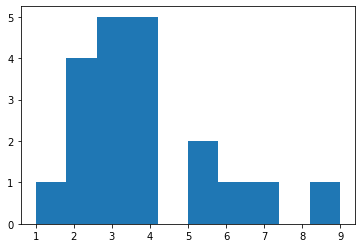

In [10]:
# Plot the number of nodes with a given degree (x-axis is degree, y-axis is count of number of nodes)
fig = plt.figure()
plt.hist([v for k,v in G.degree()]) 
plt.show()

Okay, let's plot our random network. 

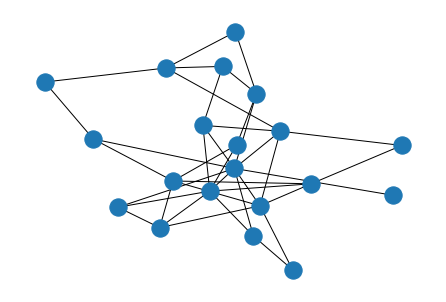

In [11]:
fig = plt.figure()
nx.draw(G)
plt.show()

**Exercise:** Experiment with n and p variables when calling the graph object G. How many edges does each node have if p = 1?

Finally, we can easily add arrows to each edge, showing the direction of the link between nodes:

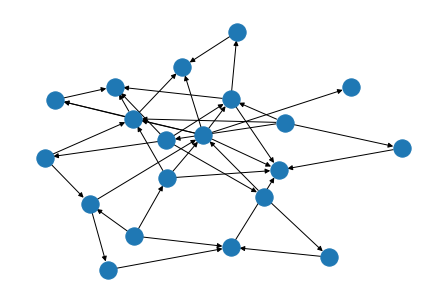

In [12]:
fig = plt.figure()
nx.draw(G, arrows = True)
plt.show()

## Network Layout

Unlike spatial data (which we'll explore in the next Module), the locations of the nodes and length of the edges between them in a network graph don't inherently mean anything. This means we are free to modify the layout of our network's nodes to maximise interpratibility. Networkx has a range of functions to help with node positioning (see section 10.4 of the [reference material](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf) for a full list). Let's create a random network with 100 nodes for this next part, to illustrate the importance of choosing a good layout. 

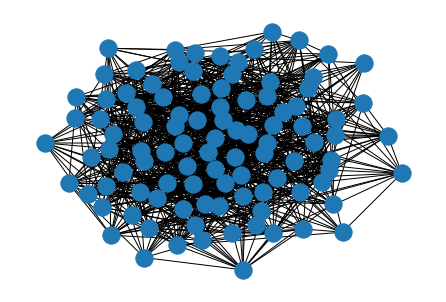

In [13]:
G = nx.gnp_random_graph(n = 100, p = 0.2, seed = 1)

fig = plt.figure()
nx.draw(G)
plt.show()

The figure is pretty crowded, and it would look even worse if we included text labels for our nodes. So, let's start improving our figure by doing the simplest thing - increasing its size.

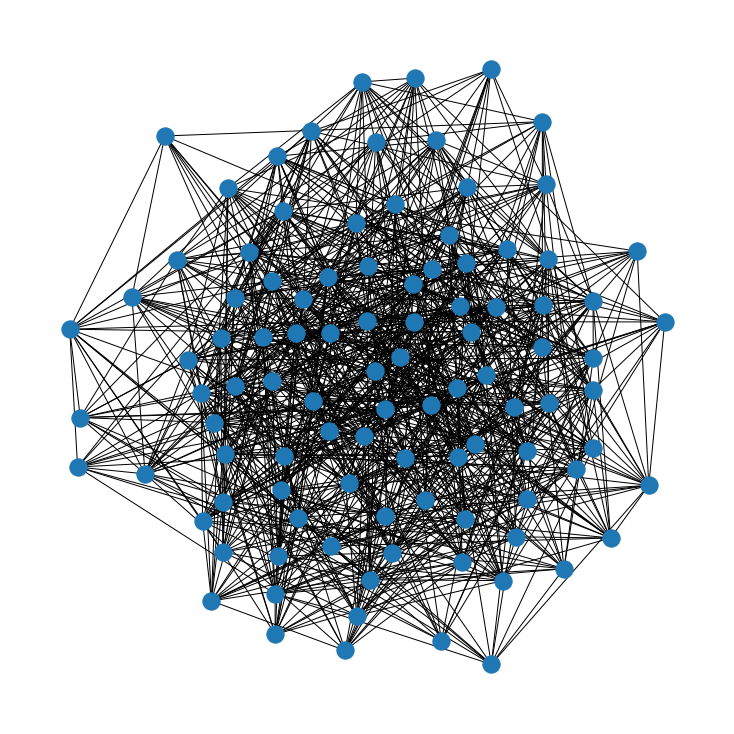

In [14]:
fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
nx.draw(G)
plt.show()

At least now there's space between each node, but the figure is still a mess. The default layout is to position nodes using a force-directed layout. Force-directed layouts try to get a nice-looking graph where edges are similar in length and cross each other as little as possible. They simulate the graph as a physical system. vertices are electrically charged particles that repulse each other when they get too close. The edges act as springs that attract connected vertices closer together. As a result, vertices are evenly distributed through the chart area, and the layout is intuitive in that vertices which share more connections are closer to each other.

Fruchterman-Reingold is one of the most-used force-directed layout algorithms out there. We can explicitly call this layout by calling the **spring_layout** function before plotting.

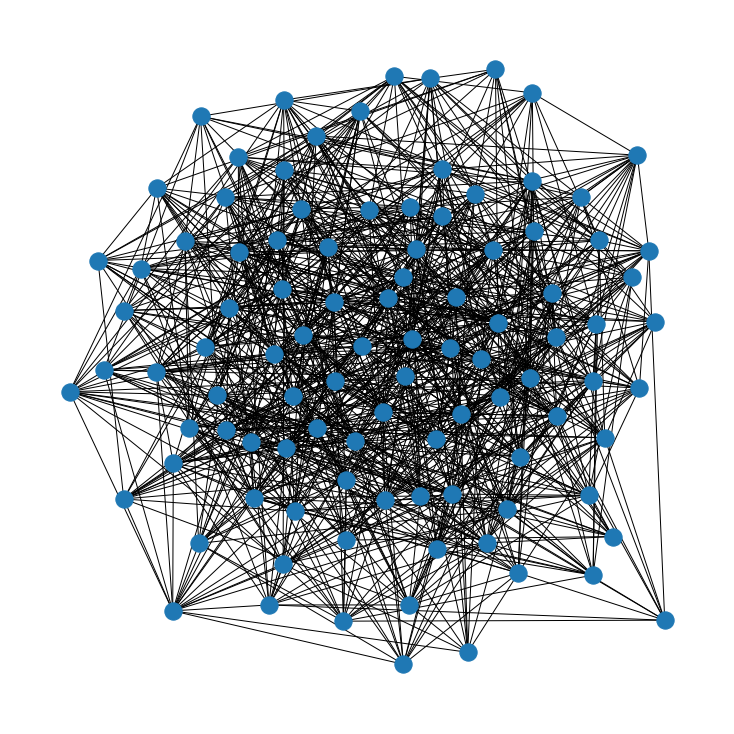

In [15]:
fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, seed = 1) # Use the spring layout, set seed so layout is fixed every time we plot.
nx.draw(G, pos=pos)
plt.show()

Okay, the default force-directed layout isn't that great for such a crowded network (without other attributes as well). Let's try a circular layout - where nodes are positioned on a circle.

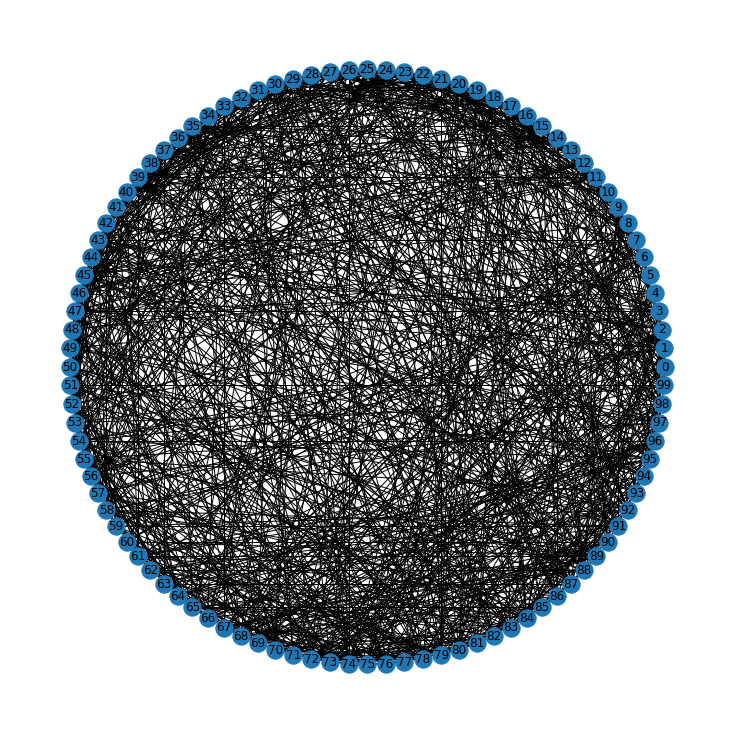

In [16]:
fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos = nx.circular_layout(G) # Use the circular layout, we don't set a seed for this layout, since node position is fixed by shape of circle
nx.draw(G, pos=pos, with_labels = True)
plt.show()

**Exercise:** Experiment with different graph layouts, from the table in section 10.4 of the [networkx reference material](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf).

Our network plot is still not too helpful, since the edges we’re examining are so dense. One way to approach this is to see if we can make the network more sparse, keeping only the most important nodes or edges and discarding the rest. For example, let's trim our nodes, plotting only the most connected - those that are the source of 20 or more edges.

In [ ]:
subset_nodes=[] # empty list of subset node IDs

for node in G: # Loop over nodes
    if G.degree(node) >= 20: # If you're a node with a degree >= 20
        subset_nodes.append(node) # You're in the subset

G_sub = G.subgraph(subset_nodes) # Subset graph to only nodes in subset_nodes vector
        
# create and draw a subgraph
fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos = nx.circular_layout(G_sub) # Use the circular layout, we don't set a seed for this layout, since node position is fixed by shape of circle
nx.draw(G_sub, pos=pos, with_labels = True)
plt.show()

That's a bit better, but we still need more pre-attentive attributes (such as colour and size) to higlight different nodes or edges. We'll look at that more below. First, let's finish this section on layouts by looking at bipartite graphs.

### Bipartite layouts

Bipartite networks need their own special layout. Remember, bipartite networks are networks whose nodes can be divided into two disjoint sets - A and B, where the endpoints of each edge are never in the same set. For example, group A could be producers, group B consumers. Let's generate a bipartite random network and see what this looks like.

In [ ]:
G = bipartite.random_graph(n = 10, # number of nodes in first set,
                              m = 15, # number of nodes in second set,
                              p = 0.5) # probability of edge from one node to another

Let's visualise G with a force-directed layout.

In [ ]:
fig = plt.figure(figsize = (7,10)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, seed = 1) # Use the circular layout, we don't set a seed for this layout, since node position is fixed by shape of circle
nx.draw(G, with_labels = True)
plt.show()

But remember, this is a bipartite network, so we need to use a special bipartite layout, which makes it clearer what this kind of network looks like. First, we need to identify which set of nodes belongs on the left hand side. We can use the **bipartite.sets** function to find the left and right hand sets for us. Then we can visualise our bipartite network.

In [ ]:
left_nodes, right_nodes = bipartite.sets(G)

In [ ]:
fig = plt.figure(figsize = (7,10)) # figsize takes width and height arguments (inches)
pos = nx.bipartite_layout(G, left_nodes) # Use the bipartite_layout function to set a bipartite layout, note we need to set which node set is on the left
nx.draw(G,pos = pos, with_labels = True, arrows = True) # Draw the bipartite network, with labels and arrows to show edge direction

## Distinguishing nodes and edges with colour

Experimenting with your network's layout is a critical first step to maximising the interpratibility of your figure. But, with complex networks like the one we generated above, we need to use other pre-attentive attributes such as shape and colour if we want to highlight particular nodes or edges. Let's start by generating a random network with 20 nodes in a force-directed (spring) layout, but this time we'll add labels to our nodes.

In [ ]:
G = nx.gnp_random_graph(n = 20, p = 0.2, seed = 1)
fig = plt.figure(figsize = (6,6)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, seed = 1) # Use the spring layout
nx.draw(G, pos=pos, with_labels = True)
plt.show()

Let's work with colour first. We can create a vector of node colours easily. For example, let's colour all our nodes green.

In [ ]:
colour_map = np.repeat("green", G.number_of_nodes())
colour_map

In [ ]:
fig = plt.figure(figsize = (6,6)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, seed = 1) # Use the spring layout
nx.draw(G, node_color=colour_map, with_labels=True) # Add node_colour argument
plt.show()

If we only wanted to use a single colour for all nodes, what we did above is not needed - we can just specify the node color directly (node_color = "green"). But, if we want to colour nodes based on their attributes, a vector of node colours is exactly what we need. For example, let's colour the first five nodes red. We can build our node colour vector to do this using a for-loop and an if-else statement. Note there are other (maybe better) ways to build the colour vector other than explicit for-loops (e.g., list comprehensions) that you would have covered in IFQ718. So, you're welcome to practice your IFQ718 skills here by employing alternative methods to build the colour vector.

In [ ]:
colour_map = [] # Empty node colour map vector to begin
for node in G: # Loop over nodes
    if node < 5: # If you're node 0-4 (first 5 nodes)
        colour_map.append('red') # You're red
    else: # If you're not node 0-4
        colour_map.append('green') # You're green     

fig = plt.figure(figsize = (6,6)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, seed = 1) # Use the spring layout
nx.draw(G, node_color=colour_map, with_labels=True) # Add node_colour argument
plt.show()

What about if we wanted to colour only the most connected nodes? Let's quickly look at our node degree distribution:

In [ ]:
fig = plt.figure()
plt.hist([v for k,v in G.degree()]) 
plt.show()

G.degree()

Let's colour all nodes with degree > 4 red and all others green.

In [ ]:
colour_map = [] # Empty node colour map vector to begin
for node in G: # Loop over nodes
    if G.degree(node) > 4: # If you're a node with degree > 4
        colour_map.append('red') # You're red
    else: # If you're a node with degree <= 4
        colour_map.append('green') # You're green     

fig = plt.figure(figsize = (6,6)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, seed = 1) # Use the spring layout
nx.draw(G, node_color=colour_map, with_labels=True) # Add node_colour argument
plt.show()

**Exercise:**
1) Colour all nodes with degree < 3 a different colour to all nodes with degree >= 3.\
2) Generate a bipartite graph and colour the left side green and the right side red.

Next, let's look at colouring edges. The approach to customising colours is very similar for edges as it is for nodes. As an example, let's colour all edges sourced from nodes 0-3 red, and all others green. We'll also colour nodes 0-3 red, and >3 green too. Finally, we'll also add back in arrows, so we can distinguish between source and target nodes for each edge.

In [ ]:
node_colour_map = [] # Empty node colour map vector to begin
for node in G: # Loop over nodes
    if node < 4: # If you're node 0-3 (first 4 nodes)
        node_colour_map.append('red') # You're red
    else: # If you're not node 0-3
        node_colour_map.append('green') # You're green    
        
edge_colour_map = [] # Empty node colour map vector to begin
for u,v in G.edges: # Loop over source (u) and target (v) nodes for each edge
    if u < 4: # If you're an edge sourced from nodes 0-3
        edge_colour_map.append('red') # You're red
    else: # If you're an edge sourced from nodes >3
        edge_colour_map.append('green') # You're green     

fig = plt.figure(figsize = (6,6)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, seed = 1) # Use the spring layout
nx.draw(G, node_color = node_colour_map, edge_color = edge_colour_map, with_labels=True, arrows = True) # Add node_colour argument
plt.show()

Returning to our 100 node random graph earlier in this exercise. Let's colour the most connected nodes red, and all the others light grey. We'll also colour all the edges by the colour of their source nodes.

In [ ]:
G_100 = nx.gnp_random_graph(n = 100, p = 0.2, seed = 1)

max_deg_node = max(G_100.degree(), key=lambda tup: tup[1])[1]
node_colour_map = [] # Empty node colour map vector to begin

for node in G_100: # Loop over nodes
    if G_100.degree(node) == max_deg_node: # If you're the node with the highest degree
        node_colour_map.append('red') # You're red
    else: # If you're a node with degree <= 20
        node_colour_map.append('lightgray') # You're green     
        
edge_colour_map = [] # Empty edge colour map vector to begin
for u,v in G_100.edges: # Loop over source (u) and target (v) nodes for each edge
    if G_100.degree(u) == max_deg_node: # If you're an edge sourced from nodes with degree > 20
        edge_colour_map.append('red') # You're red
    else: # If you're an edge sourced from nodes with degree <= 20
        edge_colour_map.append('lightgray') # You're green     
        
fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos = nx.circular_layout(G_100) # Use the circular layout
nx.draw(G_100, pos = pos, node_color = node_colour_map, edge_color = edge_colour_map, with_labels=True, arrows = True) # Add node_colour argument
plt.show()

So, node 30 and 46 are the most connected nodes, with 29 edges sourced from each of them. But, it's difficult to see all the edges that are coloured red - they are covered by the light grey edges. But, we can subset our nodes and edges into two lists - one for nodes 30 and 46 and another for the other 98 nodes. Then, we can plot the 98 green nodes first, and the remaining two nodes on top of them. We've done plotting like this many times before with Matplotlib. First we define our nodes and edge subsets, then we call manually them in the order we want to plot them using [**draw_networkx_nodes**](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html) and [**draw_networkx_edges**](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html).

In [ ]:
max_deg_node = max(G_100.degree(), key=lambda tup: tup[1])[1]

node_list_1 = [] 
node_list_2 = [] # Empty node colour maps for each community
for node in G_100: # Loop over nodes
    if G_100.degree(node) == max_deg_node: # If you're the node with the highest degree
        node_list_1.append(node) # You're red
    else: # If you're a node with degree <= 20
        node_list_2.append(node) # You're green   
        
edge_colour_map1 = G_100.edges(node_list_1) # Pull out all edges with source nodes in list 1
edge_colour_map2 = G_100.edges(node_list_2) # Pull out all edges with source nodes in list 2

fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos = nx.circular_layout(G_100)#nx.circular_layout(G_100) #calculate position for each node
# pos is needed because we are going to draw a few nodes at a time,
# pos fixes their positions.

# Draw the graph, but don't color the nodes
nx.draw(G_100, pos = pos,  edge_color='k', with_labels=True)

#For each community list, draw the nodes, over our full network, giving them a specific colour.
nx.draw_networkx_nodes(G_100, pos, nodelist=node_list_2, node_color='lightgray')  # plot grey nodes first
nx.draw_networkx_nodes(G_100, pos, nodelist=node_list_1, node_color='red')  # plot red nodes last

# Now, draw the edges for each community over our full network, giving them a specific colour
nx.draw_networkx_edges(G_100, pos, edgelist=edge_colour_map2, edge_color='lightgray') # plot grey edges first
nx.draw_networkx_edges(G_100, pos, edgelist=edge_colour_map1, edge_color='red') # plot red edges last
plt.show()

Before we move on, one last demonstration of force-directed layouts. Remember, nodes which share more connections are closer to each other in a force-directed layout. Given this, we would expect our two nodes with the highest connectivity to be in the middle of our network - since they are connected to the most nodes. Let's see if this is true.

In [ ]:
fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G_100)#nx.circular_layout(G_100) #calculate position for each node
# pos is needed because we are going to draw a few nodes at a time,
# pos fixes their positions.

# Draw the graph, but don't color the nodes
nx.draw(G_100, pos = pos,  edge_color='k', with_labels=True)

#For each community list, draw the nodes, over our full network, giving them a specific colour.
nx.draw_networkx_nodes(G_100, pos, nodelist=node_list_2, node_color='lightgray')  # plot grey nodes first
nx.draw_networkx_nodes(G_100, pos, nodelist=node_list_1, node_color='red')  # plot red nodes last

# Now, draw the edges for each community over our full network, giving them a specific colour
nx.draw_networkx_edges(G_100, pos, edgelist=edge_colour_map2, edge_color='lightgray') # plot grey edges first
nx.draw_networkx_edges(G_100, pos, edgelist=edge_colour_map1, edge_color='red') # plot red edges last
plt.show()

**Exercise:** In the figure above, colour all nodes with a connectivity of less than 13 blue. Don't worry about colouring their edges. Where are these less-connected nodes positioned in the network visualisation - towards the centre or on the outer edges?

### Colouring communities of nodes

We can group nodes into communities and then visualise these groupings with colour. Groups can be defined either by our node set's attributes (which we've seen with the company example above) or by identifying nodes that are more connected to each other than others (finding community structure). The latter approach is a [rich field of study](https://en.wikipedia.org/wiki/Community_structure) in its own right and we'll briefly explore some approaches to grouping data in a later module.

For now, let's consider how we can use colour to group nodes that are within communities we know of already. For example, what if we were making a network diagram showing the relationships between people who work at different companies? Each node would be a person, the edges their relationships, but we could colour the nodes to distinguish which company (community) they work for. Let's break our network of 100 nodes above into four companies - A, B, C and D to see how we can do this.

In [17]:
G_100 = nx.gnp_random_graph(n = 100, p = 0.2, seed = 1)

for node in G_100: # Loop over nodes
    G_100.nodes[node]["company"] = random.sample(["A","B","C","D"],1)[0] # Randomly allocate node to company

G_100.nodes.data()

NodeDataView({0: {'company': 'D'}, 1: {'company': 'A'}, 2: {'company': 'A'}, 3: {'company': 'D'}, 4: {'company': 'D'}, 5: {'company': 'C'}, 6: {'company': 'B'}, 7: {'company': 'B'}, 8: {'company': 'B'}, 9: {'company': 'D'}, 10: {'company': 'B'}, 11: {'company': 'A'}, 12: {'company': 'D'}, 13: {'company': 'A'}, 14: {'company': 'A'}, 15: {'company': 'A'}, 16: {'company': 'D'}, 17: {'company': 'A'}, 18: {'company': 'C'}, 19: {'company': 'A'}, 20: {'company': 'B'}, 21: {'company': 'B'}, 22: {'company': 'B'}, 23: {'company': 'C'}, 24: {'company': 'D'}, 25: {'company': 'A'}, 26: {'company': 'A'}, 27: {'company': 'A'}, 28: {'company': 'A'}, 29: {'company': 'D'}, 30: {'company': 'C'}, 31: {'company': 'C'}, 32: {'company': 'C'}, 33: {'company': 'D'}, 34: {'company': 'C'}, 35: {'company': 'B'}, 36: {'company': 'C'}, 37: {'company': 'B'}, 38: {'company': 'B'}, 39: {'company': 'B'}, 40: {'company': 'B'}, 41: {'company': 'B'}, 42: {'company': 'D'}, 43: {'company': 'A'}, 44: {'company': 'C'}, 45: {'

Now, let's colour our nodes by what company they're from. We'll add a legend too, using Matplotlib. We'll make this network with a for-loop, looping over each company's nodes.

In [ ]:
companies = ["A", "B", "C", "D"] # names of company
colours = ["red", "green", "blue", "orange"] # company colours

fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G_100, seed = 1) # Use the spring layout with a seed set
nx.draw(G_100, pos=pos, edge_color='black', with_labels = True) # Plot full graph

for i in range(0,len(companies)): # Loop over companies, adding company nodes in each loop
    curr_node_list = [] # Start with empty list
    
    for node in G_100.nodes: # For each node
        if G_100.nodes[node]["company"] == companies[i]: # If you're in the current company
            curr_node_list.append(node) # You're in the node list
            
    #For each community list, draw the nodes, over our full network, giving them a specific colour.
    # Notice that we have given each of these plot objects a label, we need this when we build the axes legend
    # as we've seen in previous modules with Matplotlib
    nx.draw_networkx_nodes(G_100, pos, nodelist=curr_node_list, node_color=colours[i], label = companies[i])  
    
plt.legend(loc = "right", title = "Company", fontsize=16, title_fontsize=18, bbox_to_anchor=(1.15, 0.5))
plt.show()

This looks like a tangle of fairy lights and not that realistic - if this network represents relationships between people, you would expect nodes from each of the four companies to be positioned closer to each other, given they should have more shared edges (relationships) within company than between company. But, being able to distinguish nodes like this is really useful if we have attributes that we want to encode in our network graph. We'll see this in an activity later this Module.

## Distinguishing nodes and edges with size

We can change the size of our network's nodes and edges based on their attributes. For example, let's scale the size of the nodes in a 20-node random network by their degree. Note that the default node size, according to the [documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) is 300, with no units given. So, we'll multiply the degree of each node by 200 to get node size numbers in the 100s.

In [ ]:
G = nx.gnp_random_graph(n = 20, p = 0.2, seed = 1)

node_sizes = [200*val for (node, val) in G.degree()] # This is a list comprehension (https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions)

fig = plt.figure(figsize = (6,6)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, k = 1, seed = 1) # Use the spring layout, note the k argument sets the optimal distance between nodes in your figure
nx.draw(G, pos = pos, node_color="lightblue", node_size = node_sizes,  # Add node_size argument
        with_labels=True)
plt.show()

**Exercise:** Returning to our 100-node network diagram where the nodes are coloured by company (the one that looks like a pile of fairy lights), scale each node's size by its degree. You'll need to experiment with your degree multiplier a little bit. HINT: You'll need to find the node sizes for each company subset seperately (within the for-loop).

We can also change the width of our edge lines, scaling them to the weight of the connection between the source and target node. Let's add random weights to our 20-node random network and then see what this looks like.

In [ ]:
G = nx.gnp_random_graph(n = 20, p = 0.2, seed = 1)
node_sizes = [200*val for (node, val) in G.degree()] # This is a list comprehension (https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions)

for (u, v) in G.edges(): # For each edge
    G.edges[u,v]['weight'] = random.randint(0,5) # Add a random weight, between 0 and 5
    
edge_weights = list(nx.get_edge_attributes(G,'weight').values()) # Extract edge attribute 'weight' values, and convert to list

fig = plt.figure(figsize = (7,7)) # figsize takes width and height arguments (inches)
pos = nx.spring_layout(G, k = 1, seed = 1) # Use the spring layout, note the k argument sets the optimal distance between nodes in your figure
nx.draw(G, pos = pos, node_color="lightblue", node_size = node_sizes, # Add node_size argument
        width = edge_weights, # Add width argument
        with_labels=True)
plt.show()

**Exercise:** Experiment with the width of the edges in the figure above, by changing the interval we draw random integers from, or multiplying edge_weights by a constant.